# Final Project for Applied Machine Learning Fall 2019

### Title: *Predicting Daily London Bikeshare Usage Based on Weather Variables (Jan 2015- Jan 2017)*

#### Group Members: *Katie Edwards, Sara Mithani, Jackie Leete*

Date Created: *November 24, 2019*



Link to data set: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

##### Project Overview:
Our overarching goal was to predict number of bikes from the bikeshare that have been used in London based on weather variables (real temp, feels like temp, humidity, wind speed, season) and if it is a holiday or weekend. We used supervised learning models, because we are predicting labeled data (i.e. the number of bikes).

Explainations of all of the variables in the data set:  
"timestamp" - timestamp field for grouping the data  
"cnt" - the count of new bike shares  
"t1" - real temperature in C  
"t2" - temperature in C "feels like"   
"hum" - humidity in percentage  
"wind_speed" - wind speed in km/h  
"weather_code" - category of the weather  
"is_holiday" - boolean field - 1 holiday / 0 non holiday  
"is_weekend" - boolean field - 1 if the day is weekend  
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.  

In [1]:
#importing necessary materials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, ShuffleSplit, train_test_split, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
#importing and reading the data
bike_df = pd.read_csv("london_merged.csv", parse_dates=['timestamp'])

In [3]:
#looking at the shape of the bikesharing data
bike_df.shape

(17414, 10)

In [4]:
#looking at first 24 hours of the bikesharing data
bike_df.head(24)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [5]:
#resampling the data to be averaged over every day instead of every hour
new_bike_df = bike_df.resample('D', on = 'timestamp').agg({"cnt": np.sum, "t1": np.mean, "t2": np.mean, "hum": np.mean, "wind_speed": np.mean, "weather_code": np.mean,"is_holiday": np.mean, "is_weekend": np.mean, "season": np.mean})



In [6]:
#looking at the new shape of the data
new_bike_df.shape

(731, 9)

In [7]:
#looking at the new head of the data
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,2.875000,0.0,1.0,3.0
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,3.333333,0.0,0.0,3.0
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,3.083333,0.0,0.0,3.0
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,2.608696,0.0,0.0,3.0
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,3.500000,0.0,0.0,3.0


In [8]:
#looking at the new tail of the data
new_bike_df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-12-30,11566,3.270833,1.062500,98.687500,9.000000,4.375000,0.0,0.0,3.0
2016-12-31,11424,7.437500,5.041667,90.958333,13.312500,4.083333,0.0,1.0,3.0
2017-01-01,6421,7.000000,4.437500,88.437500,14.125000,6.250000,0.0,1.0,3.0
2017-01-02,11823,3.729167,0.937500,83.145833,11.166667,1.208333,1.0,0.0,3.0
2017-01-03,19436,3.395833,-0.625000,81.395833,18.937500,2.333333,0.0,0.0,3.0


In [9]:
#dropping NAs and one of the variables ("weather_code") that didn't make sense anymore after resampling
new_bike_df = new_bike_df.dropna(how='any')
new_bike_df = new_bike_df.drop(columns = "weather_code")

In [10]:
#looking at the shape of the data again
new_bike_df.shape

(730, 8)

In [11]:
#looking at the head of the data again
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season
timestamp,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,3.0
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,3.0
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,3.0
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,3.0
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,3.0


In [12]:
#confirming no missing data in our data set
new_bike_df.isnull().sum()

cnt           0
t1            0
t2            0
hum           0
wind_speed    0
is_holiday    0
is_weekend    0
season        0
dtype: int64

In [13]:
#converting the season variable into a string variable so that we can use pd.get_dummies on it
new_bike_df.season = new_bike_df.season.astype(str)

# Get dummies
new_bike_df = pd.get_dummies(new_bike_df, prefix_sep='_')
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
timestamp,,,,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,0,0,0,1
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,0,0,0,1
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,0,0,0,1
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,0,0,0,1
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,0,0,0,1


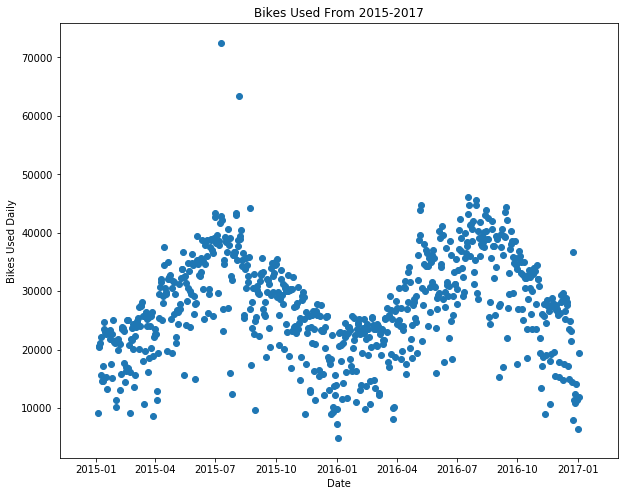

In [14]:
# Plotting the data for bikes used over the two years
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(new_bike_df.index, 
           new_bike_df["cnt"])
ax.set(xlabel='Date', ylabel='Bikes Used Daily',
       title="Bikes Used From 2015-2017")
plt.show()

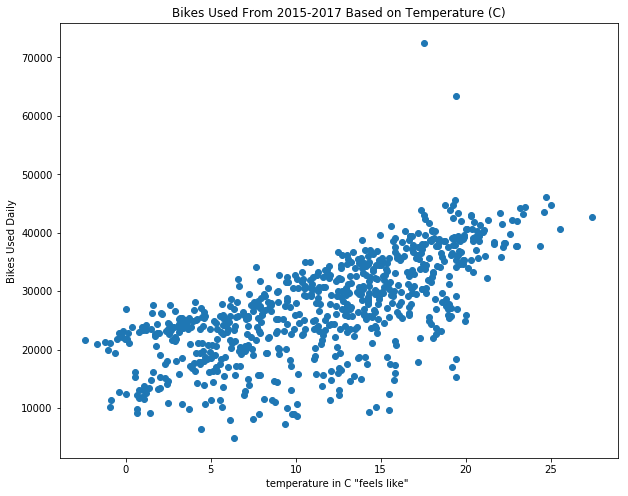

In [15]:
# Plotting the bikes used data based on temperature
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(new_bike_df["t2"], 
           new_bike_df["cnt"])
ax.set(xlabel='temperature in C "feels like" ', ylabel='Bikes Used Daily',
       title="Bikes Used From 2015-2017 Based on Temperature (C)")
plt.show()

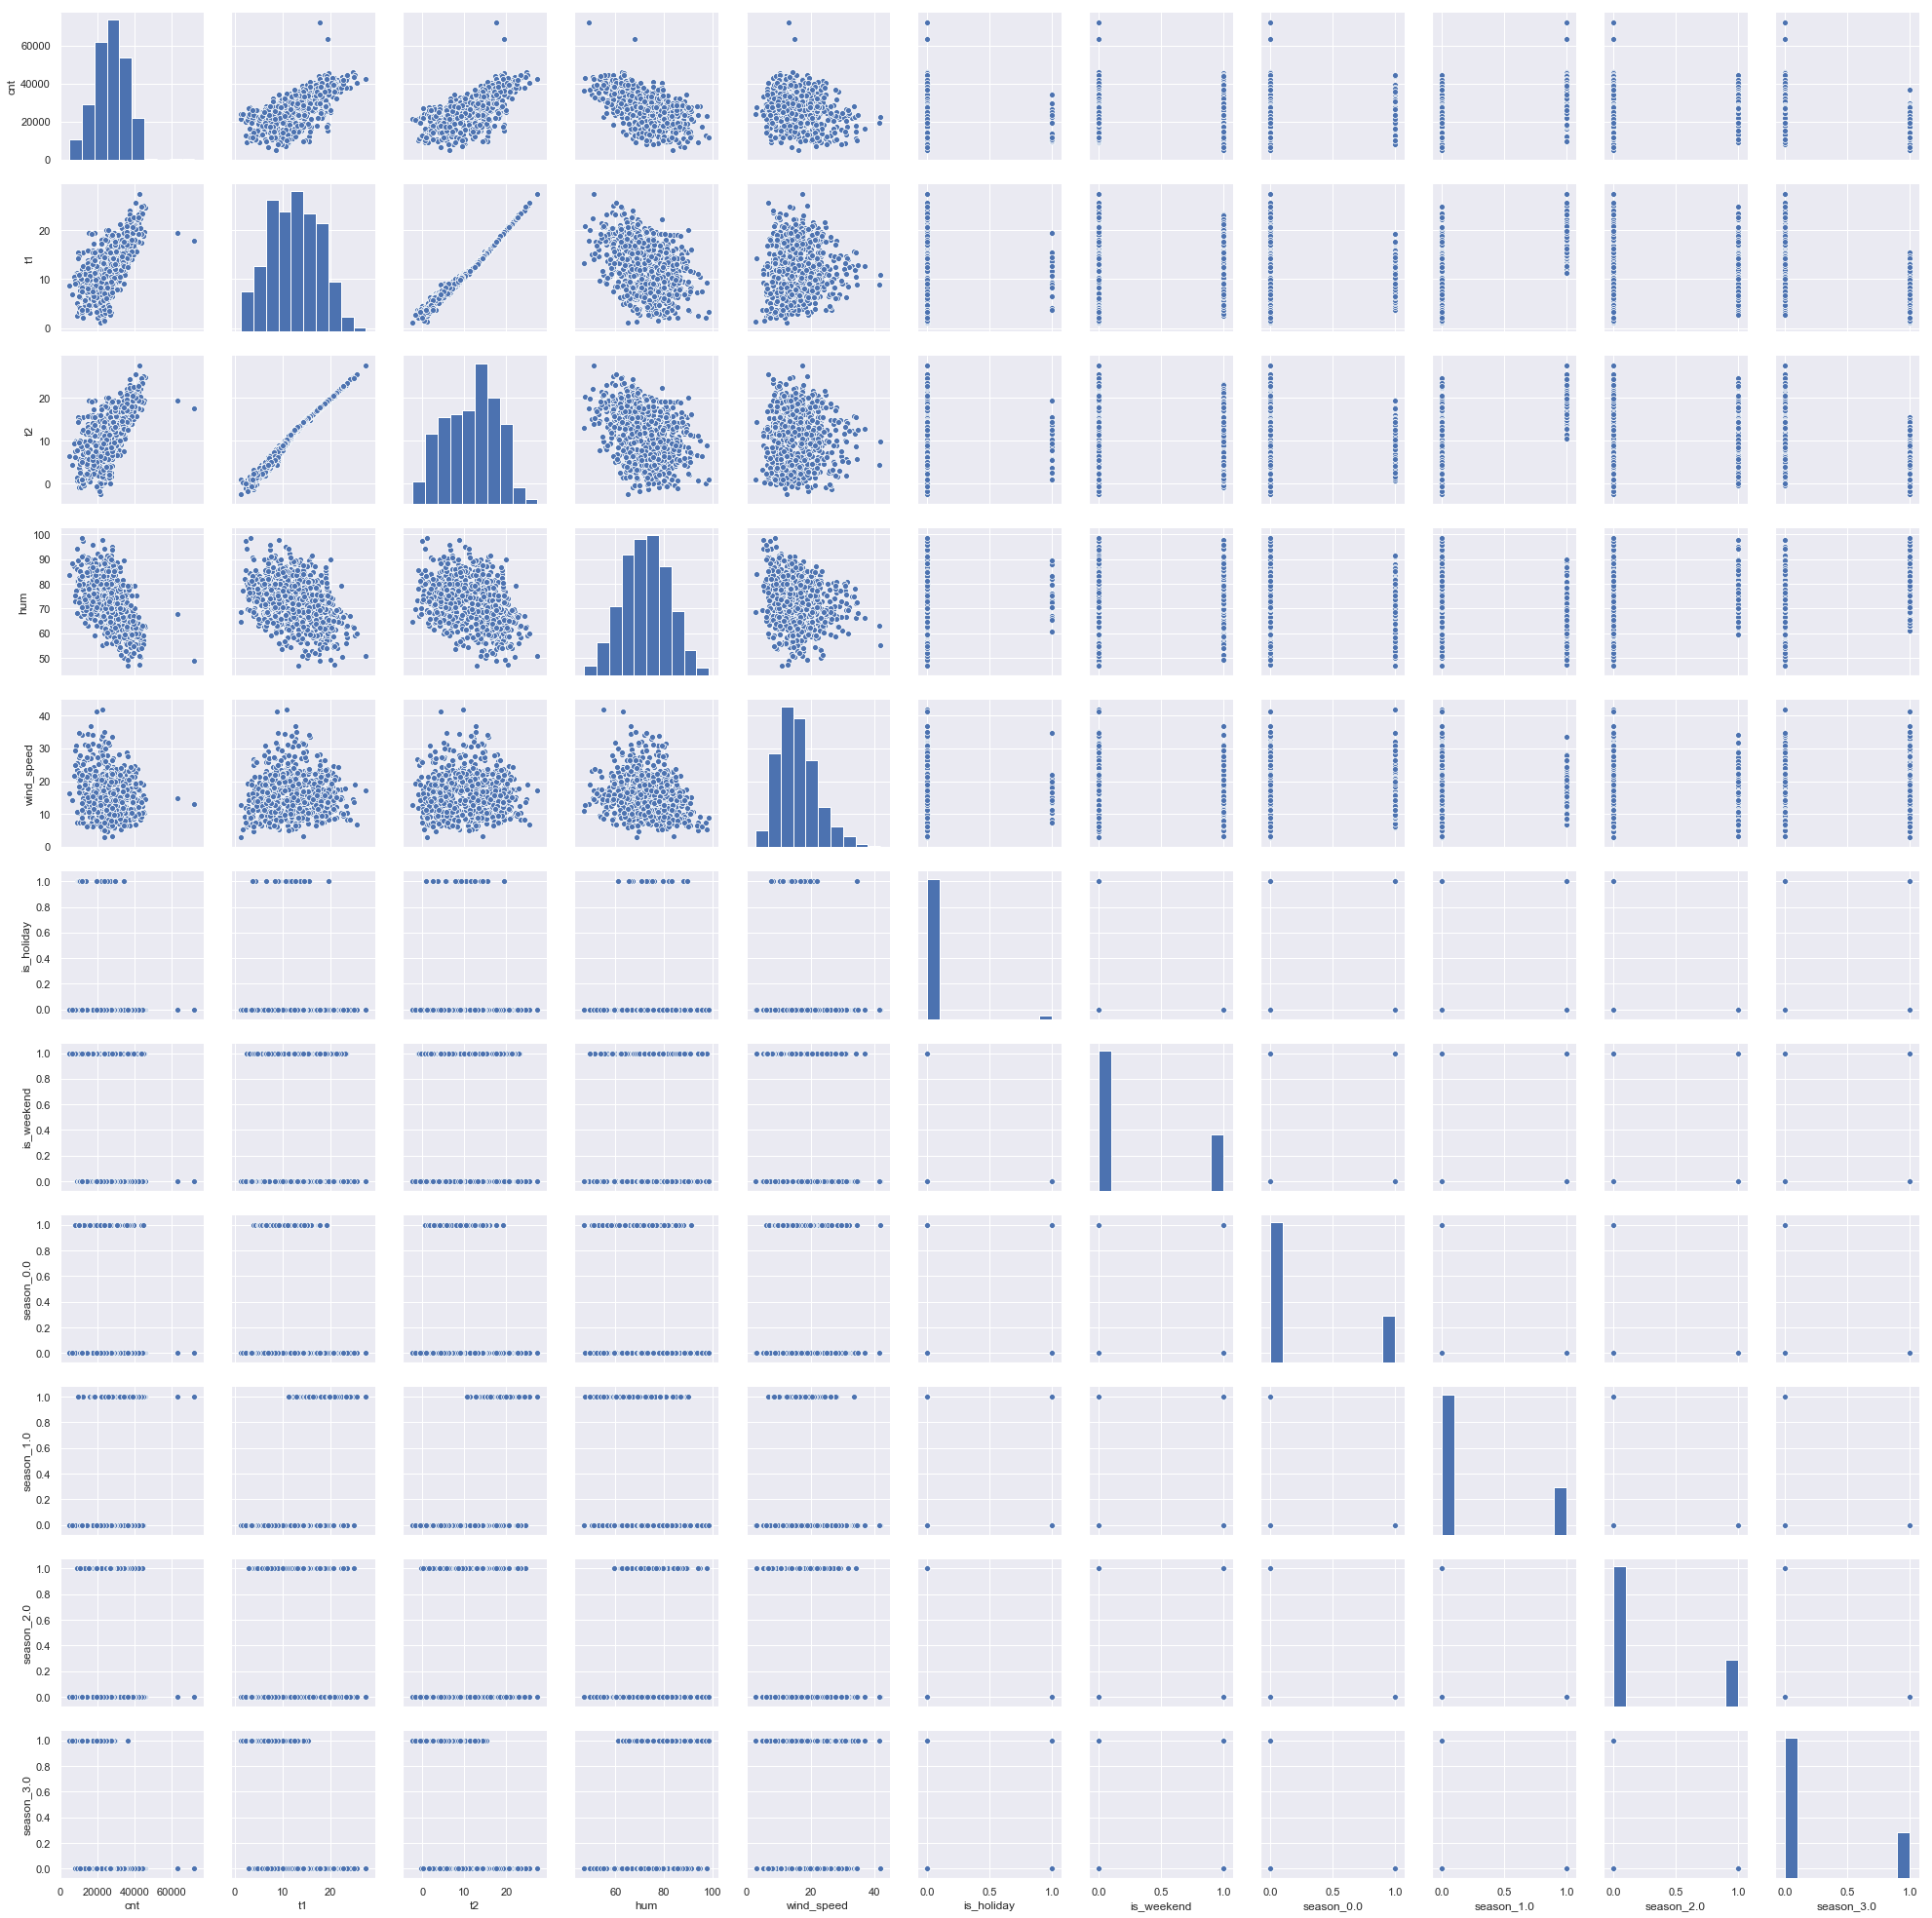

In [16]:
#pairplots for all of the variables
sns.set()
sns.pairplot(new_bike_df);

In [17]:
#Correlation table of all the variables
new_bike_df.corr()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
cnt,1.000000,0.677384,0.676134,-0.564006,-0.197499,-0.153142,-0.296412,-0.061311,0.516137,0.050691,-0.508016
t1,0.677384,1.000000,0.992710,-0.370407,0.036309,-0.046082,-0.005675,-0.205506,0.673394,0.065146,-0.535604
t2,0.676134,0.992710,1.000000,-0.335845,-0.008522,-0.043292,-0.009053,-0.199886,0.647498,0.093443,-0.543515
hum,-0.564006,-0.370407,-0.335845,1.000000,-0.186382,0.048443,0.044033,-0.225948,-0.335404,0.227164,0.337272
wind_speed,-0.197499,0.036309,-0.008522,-0.186382,1.000000,-0.004301,0.015882,0.047056,-0.014276,-0.145154,0.112194
is_holiday,-0.153142,-0.046082,-0.043292,0.048443,-0.004301,1.000000,-0.094812,0.085484,-0.043805,-0.085954,0.044045
is_weekend,-0.296412,-0.005675,-0.009053,0.044033,0.015882,-0.094812,1.000000,0.002237,-0.004742,0.001259,0.001259
season_0.0,-0.061311,-0.205506,-0.199886,-0.225948,0.047056,0.085484,0.002237,1.000000,-0.336996,-0.333323,-0.333323
season_1.0,0.516137,0.673394,0.647498,-0.335404,-0.014276,-0.043805,-0.004742,-0.336996,1.000000,-0.333323,-0.333323
season_2.0,0.050691,0.065146,0.093443,0.227164,-0.145154,-0.085954,0.001259,-0.333323,-0.333323,1.000000,-0.329690


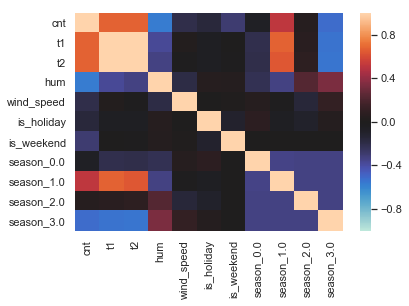

In [18]:
#Heat map based on correlation table
ax = sns.heatmap(new_bike_df.corr(), center=0, vmin=-1, vmax=1)

In [19]:
#reimporting the data to remove the timestamp (it was giving us problems with some of the analysis)
new_bike_df.to_csv(r'New_Data_Set_Bikes.csv')
new2_bike_df = pd.read_csv("New_Data_Set_Bikes.csv")
new2_bike_df = new2_bike_df.drop("timestamp", axis = 1)
new2_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,0,0,0,1
1,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,0,0,0,1
2,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,0,0,0,1
3,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,0,0,0,1
4,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,0,0,0,1


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to 

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,-2.096590,-1.948316,-1.770802,2.313103,-1.359833,-0.149696,1.578868,-0.580514,-0.580514,-0.574187,1.741594
1,-0.801745,-0.864807,-0.784902,0.842957,-1.142031,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
2,-0.773728,-0.901330,-1.008508,0.693749,0.007292,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
3,-0.721297,-0.978787,-1.144027,0.610844,0.612183,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
4,-1.356396,-0.532044,-0.608728,0.737634,0.727713,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594


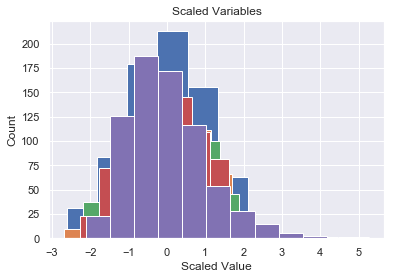

In [20]:
#Scaling all variables
plt.title("Scaled Variables")
plt.ylabel("Count")
plt.xlabel("Scaled Value")

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.cnt))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["cnt"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.hum))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["hum"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.t1))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["t1"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.t2))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["t2"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.wind_speed))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["wind_speed"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.is_holiday))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["is_holiday"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.is_weekend))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["is_weekend"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df["season_0.0"]))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["season_0.0"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df["season_1.0"]))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["season_1.0"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df["season_2.0"]))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["season_2.0"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df["season_3.0"]))
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["season_3.0"] = scaled_size
new2_bike_df.head()

In [21]:
#Confirming that the scaling made the mean of each variable close to 0 and the standard deviation is 1.0
np.mean(new2_bike_df),np.std(new2_bike_df)

(cnt          -1.342914e-16
 t1            2.007527e-16
 t2           -1.612105e-17
 hum           4.045470e-17
 wind_speed   -1.171057e-16
 is_holiday    2.531080e-16
 is_weekend   -1.612105e-17
 season_0.0    6.068205e-16
 season_1.0    5.873536e-16
 season_2.0   -5.581532e-16
 season_3.0   -8.194358e-16
 dtype: float64, cnt           1.0
 t1            1.0
 t2            1.0
 hum           1.0
 wind_speed    1.0
 is_holiday    1.0
 is_weekend    1.0
 season_0.0    1.0
 season_1.0    1.0
 season_2.0    1.0
 season_3.0    1.0
 dtype: float64)

In [22]:
#Assigning all of the columns to the data matrix, dropping the Target (count of bikes)
X = new2_bike_df.drop('cnt', axis = 1)

X.head()


,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,-1.948316,-1.770802,2.313103,-1.359833,-0.149696,1.578868,-0.580514,-0.580514,-0.574187,1.741594
1,-0.864807,-0.784902,0.842957,-1.142031,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
2,-0.901330,-1.008508,0.693749,0.007292,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
3,-0.978787,-1.144027,0.610844,0.612183,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594
4,-0.532044,-0.608728,0.737634,0.727713,-0.149696,-0.633365,-0.580514,-0.580514,-0.574187,1.741594


In [23]:
#confirming the shape of X is correct
X.shape

(730, 10)

In [24]:
#confirming the shape of y is correct
y = new2_bike_df['cnt']
y.shape

(730,)

## Train Test Split

In [25]:
#train test split to prepare for the linear regression model using all the predictor variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#confirming the shape of the training data
X_train.shape, y_train.shape

((489, 10), (489,))

In [27]:
#confirming the shape of the test data
X_test.shape, y_test.shape

((241, 10), (241,))

## Linear Regression

In [28]:
#performing the linear regression
predicted = LinearRegression().fit(X_train, y_train).predict(X_test)
#mean squared error
mean_squared_error(y_test, predicted)

#Mean squared error looks fairly good

0.2495525402464169

## KNN

In [29]:
#KNN with all predictor variables
nnr = KNeighborsRegressor(n_neighbors=2) #n_neighbors=2 was best; mean squared error and the score get worse as K increases
nnr.fit(X, y)
y_pred_nn = nnr.predict(X)
#mean squared error
mean_squared_error(y, y_pred_nn)

#Mean squared error looks really good

0.1185880005073183

In [30]:
#KNN score
nnr.score(X, y)

0.8814119994926816

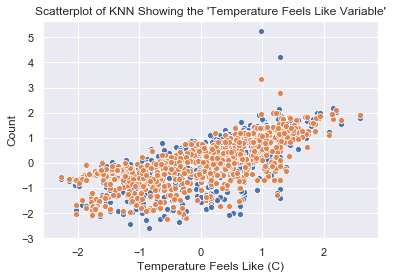

In [31]:
#scatterplot of this KNN model showing Temperature Feels Like (C) Variable
sns.scatterplot(new2_bike_df[new2_bike_df.columns[2]], y)
sns.scatterplot(new2_bike_df[new2_bike_df.columns[2]], y_pred_nn);
plt.title("Scatterplot of KNN Showing the 'Temperature Feels Like Variable'");
plt.ylabel("Count");
plt.xlabel("Temperature Feels Like (C)");

#We thought the scatterplot looked pretty good!

## Decision Tree

In [32]:
dtr = DecisionTreeRegressor(max_depth=5, random_state = 42)

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

#Mean squared error is fairly high

0.40238525691406324

## Random Forest

In [33]:
rf = RandomForestRegressor(random_state = 42)

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

#Mean squared error is better than decision tree, but still fairly high

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.36299148526700453

## Gradient Boosting 

In [34]:
gbr = GradientBoostingRegressor(random_state = 42)

# Fit 
gbr.fit(X_train, y_train)

# Predict
y_predicted = gbr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

#Mean squared error is better

0.28192012370659214

## Writing the Learning Curve Plotting Function

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    """
    function for plotting a learning curve
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Learning Curve for Linear Regression

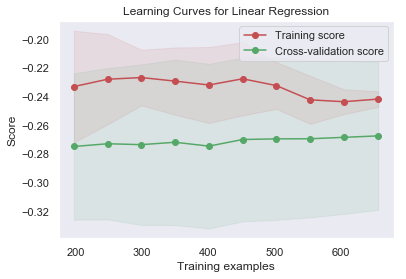

In [36]:
title = "Learning Curves for Linear Regression"

# Create the CV iterator
cv_iterator = ShuffleSplit(n_splits=5, random_state=10)
model = LinearRegression()

plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

## Learning Curve for KNN

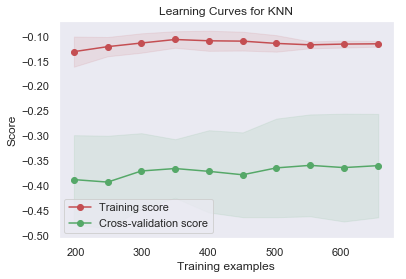

In [37]:
title = "Learning Curves for KNN"

# Create the CV iterator
cv_iterator = ShuffleSplit(n_splits=5, random_state=10)
model = KNeighborsRegressor(n_neighbors=2)

plot_learning_curve(model, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

## Learning Curve for Decision Tree Regressor

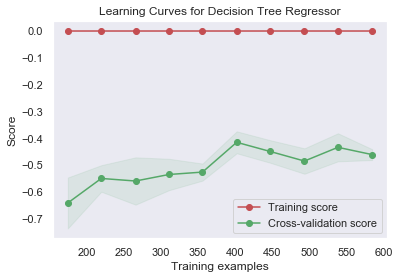

In [38]:
title = "Learning Curves for Decision Tree Regressor"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
dtr = DecisionTreeRegressor(random_state = 42)

plot_learning_curve(dtr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

## Learning Curve for Random Forest Regressor

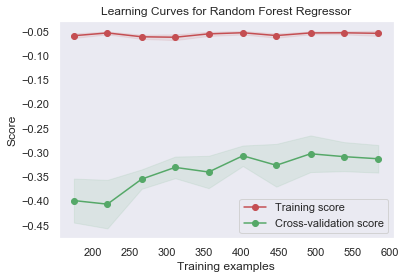

In [39]:
title = "Learning Curves for Random Forest Regressor"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
rf = RandomForestRegressor(random_state = 42)

plot_learning_curve(rf, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

## Learning Curve for Gradient Boosting Regression

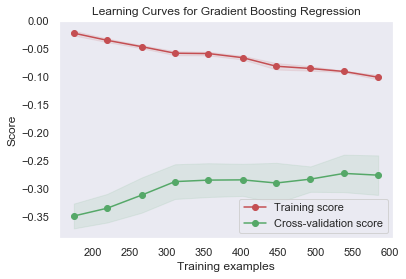

In [40]:
title = "Learning Curves for Gradient Boosting Regression"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
gbr = GradientBoostingRegressor(random_state = 42)

plot_learning_curve(gbr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()



# Finding the Best Hyperparameters for Our Models

## Finding the Best Hyperparameters for KNN

In [41]:
# Hyperparameter grid
p_grid = {
    "n_neighbors": [1, 2, 3, 5, 7, 9]
}

#GridSearchCV using KFold as the cross-validation scenario
knnr = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knnr, param_grid=p_grid, cv=KFold(n_splits=5), iid=False)
grid_search.fit(X, y)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
#Table of results
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    df_cv_results = pd.DataFrame(grid_search.cv_results_)

df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001963,0.000749,0.001770,0.000402,1,{'n_neighbors': 1},0.634233,0.146792,-0.885230,0.343980,...,0.152642,0.544654,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001512,0.000098,0.001715,0.000083,2,{'n_neighbors': 2},0.731247,0.351022,0.195065,0.453617,...,0.467415,0.188021,5,0.868262,0.880904,0.881346,0.885621,0.895193,0.882265,0.008685
2,0.001453,0.000106,0.001698,0.000081,3,{'n_neighbors': 3},0.744861,0.376177,0.246399,0.516079,...,0.502879,0.177171,4,0.830569,0.857266,0.844847,0.848303,0.860911,0.848379,0.010637
3,0.001406,0.000058,0.001749,0.000088,5,{'n_neighbors': 5},0.766243,0.433278,0.363551,0.546176,...,0.544302,0.140625,3,0.806304,0.837464,0.809397,0.820992,0.830020,0.820835,0.011856
4,0.001430,0.000067,0.001863,0.000186,7,{'n_neighbors': 7},0.771307,0.475732,0.381207,0.552546,...,0.556846,0.130852,1,0.784941,0.819088,0.781557,0.810462,0.804637,0.800137,0.014575
5,0.001708,0.000351,0.002102,0.000201,9,{'n_neighbors': 9},0.754883,0.450221,0.398802,0.559817,...,0.554002,0.124882,2,0.768529,0.804923,0.768316,0.788108,0.794099,0.784795,0.014414


In [43]:
grid_search.best_params_
#Although GridSearchCV shows us that K=7 is the optimal value of K, when we used KNN without GridSearchCV, K=2 gave us the smallest mean squared error and best score
#We think this discrepancy may be in part due to the fact that KNN on its own uses the entire dataset, while for KNN with CV/KFold we are reducing the size of the dataset into training and test sets, which may lead to this discrepancy


{'n_neighbors': 7}

In [44]:
#best parameters to use for our data
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [45]:
grid_search.score(X,y)
#As stated on line 43, the score when K=2 was better (0.8814119994926816) than below where K=7

0.8062765483644729

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

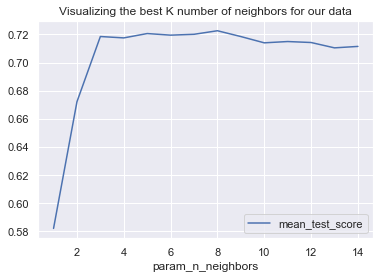

In [46]:
#Visualizing the best number of neighbors 

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create knn instance 
knn = KNeighborsRegressor()
# Create grid search instance 
gscv = GridSearchCV(knn, {"n_neighbors": range(1, 15)}, cv=kf)
gscv.fit(X, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Get k values versus mean_test_scores
cv_df.plot.line(x="param_n_neighbors", y="mean_test_score");
plt.title("Visualizing the best K number of neighbors for our data");

## Finding the Best Hyperparameters for Random Forest Regressor

In [47]:
# Create KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create Random Forest
model = RandomForestRegressor(random_state=42)
# Grid Search 
gscv = GridSearchCV(model, {"max_depth": range(1, 20),"n_estimators": range(1, 20)}, cv=kf, n_jobs=-1)
#Fit
gscv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'n_estimators': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
#Displaying the optimal hyperparameters
gscv.best_params_

{'max_depth': 7, 'n_estimators': 19}

In [49]:
#Performing the Random Forest Regressor Using the Optimal Hyperparameters
rf = RandomForestRegressor(max_depth=7,n_estimators= 19 )
rf.fit(X_train, y_train)

# Predict with the optimal hyperparameters
y_predicted = rf.predict(X_test)

# Test with the optimal hyperparameters
mean_squared_error(y_test, y_predicted)

#This value below is better than when we did not use GridSearchCV (0.36299148526700453)

0.31421466720463637

## Finding the Best Hyperparameters for Gradient Boosting Regressor

In [50]:
# Create KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
# Grid Search
gscv = GridSearchCV(model, {"max_depth": range(1, 20),"n_estimators": range(95, 105)}, cv=kf, n_jobs=-1)
#Fit
gscv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'n_estimators': range(95, 105)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
#Displaying the optimal hyperparameters
gscv.best_params_

{'max_depth': 2, 'n_estimators': 101}

In [52]:
#Performing the Gradient Boosting Regressor Using the Optimal Hyperparameters
gbr = GradientBoostingRegressor(max_depth=2,n_estimators= 101)
gbr.fit(X_train, y_train)

# Predict with the optimal hyperparameters
y_predicted = gbr.predict(X_test)

# Test with the optimal hyperparameters
mean_squared_error(y_test, y_predicted)

#This value below is better than when we did not use GridSearchCV (0.28192012370659214)

0.27809939510006193

## Conclusion

Of the various models and hyperparameters we ran, Linear Regression, KNN, and Gradient Boosting Regressor had the lowest mean squared errors (0.25, 0.12, and 0.28, respectively). Gradient Boosting performed best when we used a max depth of 2 and n estimators of 101 based on cross-validation, while KNN had the best score when we had a KNN using K=2/did not use cross-validation.

Thank you Martin for teaching us machine learning! And happy holidays! 


-Jackie, Katie, and Sara